In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#count of training dataset
train = pd.read_csv("./data/train_ver2.csv", usecols=['ncodpers'])
train.shape[0]

13647309

In [3]:
#count of test dataset
test = pd.read_csv("./data/test_ver2.csv", usecols=['ncodpers'])
test.count()

ncodpers    929615
dtype: int64

In [6]:
#number of unique coustmer in training dataset
uniqueMember=train.ncodpers.unique()
print(len(uniqueMember))

956645


In [9]:
numOccur=train.groupby('ncodpers').agg('size').value_counts()
print(numOccur)

17    605464
11    190917
8      28061
9      23470
7      16098
10     14911
1      10472
6      10012
5       8864
4       7297
2       7256
3       7000
16      5756
15      5548
13      5286
14      5213
12      5020
dtype: int64


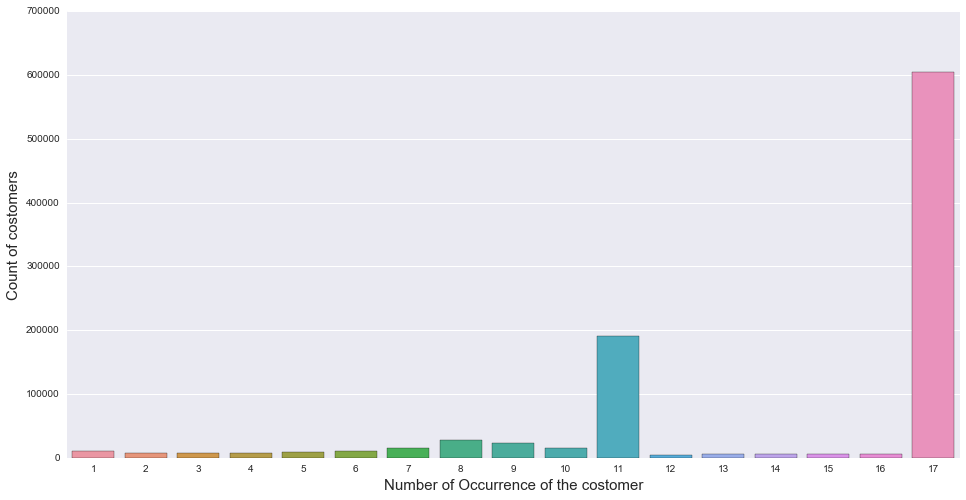

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(numOccur.index, numOccur.values)
plt.xlabel('Number of Occurrence of the costomer',fontsize=15)
plt.ylabel('Count of costomers',fontsize=15)

In [23]:
train = pd.read_csv("./data/train_ver2.csv", dtype='float16', 
                    usecols=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
                             'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1'])

In [27]:
targetCounts=train.astype('float64').sum(axis=0).sort_values()
print(targetCounts)

ind_aval_fin_ult1        316.0
ind_ahor_fin_ult1       1396.0
ind_cder_fin_ult1       5376.0
ind_deme_fin_ult1      22668.0
ind_deco_fin_ult1      24275.0
ind_pres_fin_ult1      35857.0
ind_viv_fin_ult1       52511.0
ind_hip_fin_ult1       80336.0
ind_plan_fin_ult1     125159.0
ind_ctju_fin_ult1     129297.0
ind_ctma_fin_ult1     132742.0
ind_fond_fin_ult1     252284.0
ind_valo_fin_ult1     349475.0
ind_dela_fin_ult1     586381.0
ind_ctpp_fin_ult1     591008.0
ind_tjcr_fin_ult1     605786.0
ind_reca_fin_ult1     716980.0
ind_nomina_ult1       745961.0
ind_nom_pens_ult1     810085.0
ind_cno_fin_ult1     1103620.0
ind_ecue_fin_ult1    1129227.0
ind_recibo_ult1      1745712.0
ind_ctop_fin_ult1    1760616.0
ind_cco_fin_ult1     8945588.0
dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

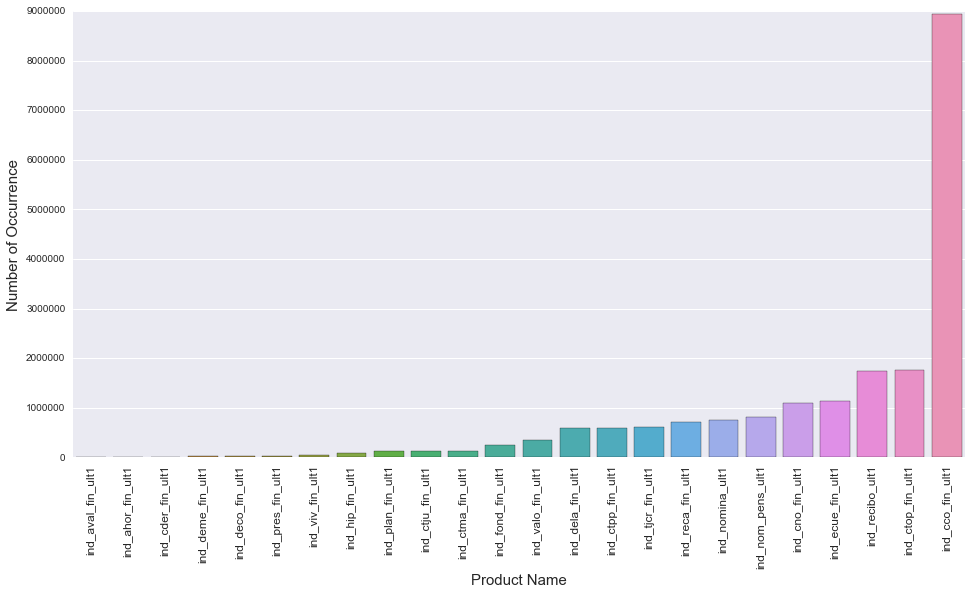

In [33]:
plt.figure(figsize=(16,8))
sns.barplot(targetCounts.index,targetCounts.values)
plt.xlabel('Product Name',fontsize=15)
plt.ylabel('Number of Occurrence',fontsize=15)
plt.xticks(rotation='vertical',fontsize=12)

Considering drop aval, ahor, cder

In [34]:
train=pd.read_csv("./data/train_ver2.csv",usecols=['fecha_dato','fecha_alta'],parse_dates=['fecha_dato','fecha_alta'])

In [36]:
train['fecha_dato_yearmonth']=train['fecha_dato'].apply(lambda x: (100*x.year)+x.month)
yearmonth=train['fecha_dato_yearmonth'].value_counts()
print(yearmonth)

201605    931453
201604    928274
201603    925076
201602    920904
201601    916269
201512    912021
201511    906109
201510    892251
201509    865440
201508    843201
201507    829817
201506    632110
201505    631957
201504    630367
201503    629209
201502    627394
201501    625457
Name: fecha_dato_yearmonth, dtype: int64


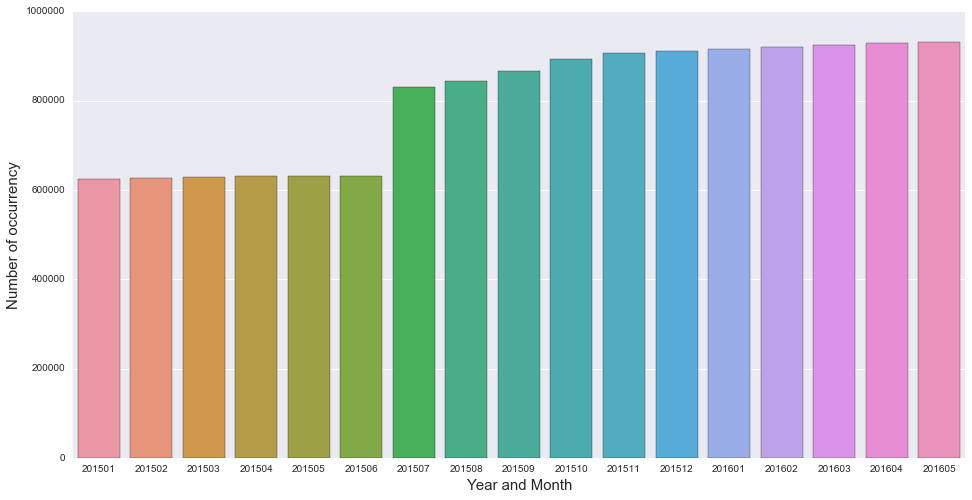

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(yearmonth.index,yearmonth.values)
plt.xlabel('Year and Month',fontsize=15)
plt.ylabel('Number of occurrency',fontsize=15)


In [45]:
train['fecha_alta_yearmonth']=train['fecha_alta'].apply(lambda x: (100*x.year)+x.month)
yearmonth=train['fecha_alta_yearmonth'].value_counts()
print(yearmonth)

201310.0    382473
201410.0    340613
201210.0    310295
201409.0    294752
201110.0    268133
201407.0    267173
201308.0    252704
201111.0    224954
201208.0    221984
201207.0    220941
201411.0    217751
201209.0    217174
201510.0    216947
201211.0    210687
201309.0    206107
201509.0    202262
201109.0    193948
201307.0    189225
201311.0    188601
201507.0    178215
201108.0    165693
201112.0    162618
201408.0    162534
201508.0    138420
201412.0    123456
201107.0    103655
201511.0    103073
200111.0    102556
200201.0     99001
200110.0     98338
             ...  
199601.0     13583
199709.0     13447
199607.0     12918
199512.0     12690
200912.0     12262
199705.0     12240
200906.0     12029
199611.0     11647
200904.0     11051
199606.0     10400
200905.0     10110
199603.0      9720
199509.0      9687
199708.0      9505
199511.0      8924
201604.0      8602
199808.0      8190
199507.0      8095
199602.0      7774
199506.0      7494
199605.0      7434
199609.0    

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

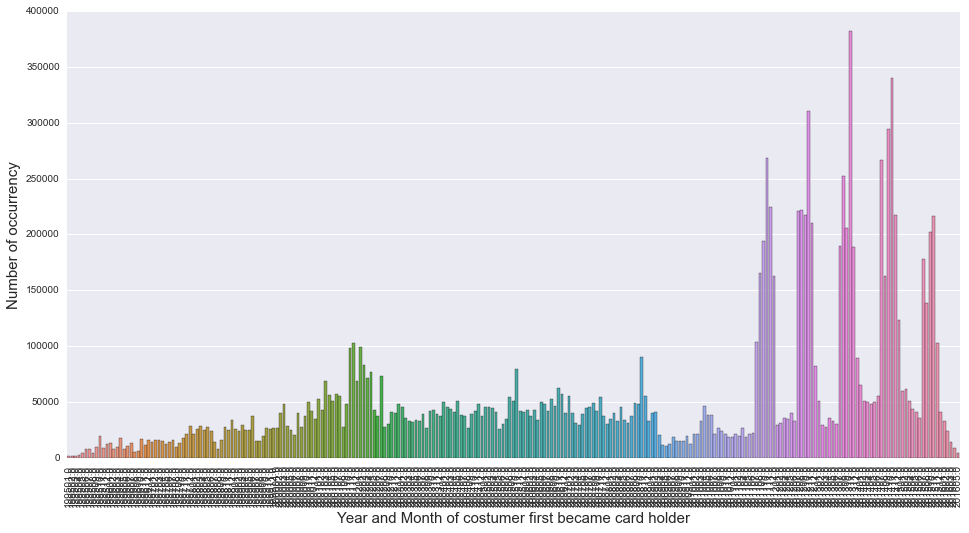

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(yearmonth.index,yearmonth.values)
plt.xlabel('Year and Month of costumer first became card holder',fontsize=15)
plt.ylabel('Number of occurrency',fontsize=15)
plt.xticks(rotation='vertical')

In [53]:
year_month=yearmonth.sort_index().reset_index()
year_month=year_month.ix[185:]

year_month.columns = ['yearmonth','number_of_occurrence']
print(year_month)

     yearmonth  number_of_occurrence
185   201006.0                 38023
186   201007.0                 21274
187   201008.0                 26536
188   201009.0                 23512
189   201010.0                 21573
190   201011.0                 18547
191   201012.0                 18257
192   201101.0                 21219
193   201102.0                 19411
194   201103.0                 26603
195   201104.0                 18425
196   201105.0                 21286
197   201106.0                 21671
198   201107.0                103655
199   201108.0                165693
200   201109.0                193948
201   201110.0                268133
202   201111.0                224954
203   201112.0                162618
204   201201.0                 29646
205   201202.0                 30626
206   201203.0                 35322
207   201204.0                 34706
208   201205.0                 40001
209   201206.0                 33062
210   201207.0                220941
2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text xticklabel objects>)

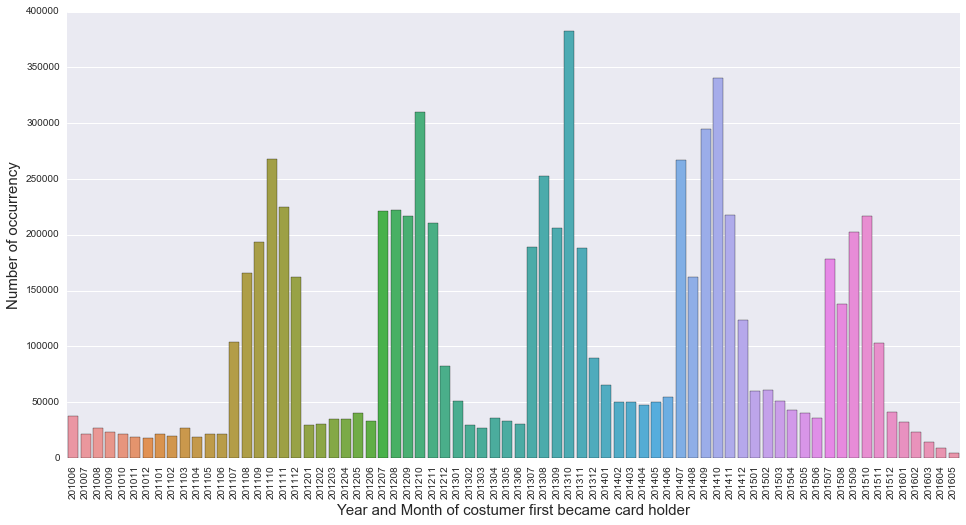

In [54]:
plt.figure(figsize=(16,8))
sns.barplot(year_month.yearmonth.astype('int'),year_month.number_of_occurrence)
plt.xlabel('Year and Month of costumer first became card holder',fontsize=15)
plt.ylabel('Number of occurrency',fontsize=15)
plt.xticks(rotation='vertical')

Why less is more: from 2010 to 2016, we observed a trend that the second six months is much higher than the first six months in a canlendar year cycle.

From BreakfastPirate: I’m only training on about 37,000 accounts – only the accounts that added a new product in June 2015. I found that the distribution of products added varied a lot by month, and June seemed to be an unusual month. Since we are predicting June 2016, I trained on only June 2015.
